# Multilayer Perceptron for Financial Forecasting

A comprehensive analysis using polynomial detrending, seasonal differencing, and neural networks for time series prediction.

In [57]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid  

excel_file = 'M3C.xls'
sheet_name = "M3Month"
category = "FINANCE"

In [58]:
data = pd.read_excel(excel_file, sheet_name=sheet_name)
print("Loaded {}".format(sheet_name))

Loaded M3Month


1. Select how many time series to train on 

In [ ]:
category_data = data[data['Category'].str.strip() == category]

# split into train and test sets
total_series = len(category_data)
N_train = 100  # Number of series for training
N_test = 45   # Number of series for testing 

train_indices = range(N_train)
test_indices = range(N_train, N_train + N_test)

print(f"Training on {N_train} series")
print(f"Testing on {N_test} completely unseen series")
print(f"Total available: {total_series} series\n")

Training on 100 series
Testing on 45 completely unseen series
Total available: 145 series



2. Process all the series chosen and combine their training sequences

In [ ]:

# Store all training sequences 
all_X_train = []
all_y_train = []
all_training_data = []  # Store all data before the scaling

# Collect all the data for the global sacling 
for idx in train_indices:
    series = category_data.iloc[idx, 6:].dropna().astype(float)
    series_id = category_data.iloc[idx, 0]
    
    print(f"Processing series {idx+1}/{N_train}: {series_id} (length: {len(series)})")
    
    # Split and detrend
    y = series.values
    train_size = len(y) - 18
    
    poly = PolynomialFeatures(degree=2)
    X_train_indices = np.arange(train_size).reshape(-1, 1)
    X_all_indices = np.arange(len(y)).reshape(-1, 1)
    
    x_poly_train = poly.fit_transform(X_train_indices)
    poly_model = LinearRegression()
    poly_model.fit(x_poly_train, y[:train_size])
    
    x_poly_all = poly.transform(X_all_indices)
    poly_trend = poly_model.predict(x_poly_all)
    de_trended = y - poly_trend
    
    # Seasonal differencing
    months_in_year = 12
    seasonal_diff = []
    for i in range(months_in_year, len(de_trended)):
        value = de_trended[i] - de_trended[i - months_in_year]
        seasonal_diff.append(value)
    
    seasonal_diff_array = np.array(seasonal_diff)
    train_portion = seasonal_diff_array[:-18]
    
    all_training_data.append(train_portion)

# Global sacler on the combined data
global_scaler = StandardScaler()
combined_training = np.concatenate(all_training_data)
global_scaler.fit(combined_training.reshape(-1, 1))

print(f"Global scaler fitted on {len(combined_training)} data points")
print(f"Mean: {global_scaler.mean_[0]:.4f}, Std: {global_scaler.scale_[0]:.4f}\n")

# scale and create sequences for each series 
for idx in train_indices:
    series = category_data.iloc[idx, 6:].dropna().astype(float)
    series_id = category_data.iloc[idx, 0]
    
    y = series.values
    train_size = len(y) - 18
    
    poly = PolynomialFeatures(degree=2)
    X_train_indices = np.arange(train_size).reshape(-1, 1)
    X_all_indices = np.arange(len(y)).reshape(-1, 1)
    
    x_poly_train = poly.fit_transform(X_train_indices)
    poly_model = LinearRegression()
    poly_model.fit(x_poly_train, y[:train_size])
    
    x_poly_all = poly.transform(X_all_indices)
    poly_trend = poly_model.predict(x_poly_all)
    de_trended = y - poly_trend
    
    months_in_year = 12
    seasonal_diff = []
    for i in range(months_in_year, len(de_trended)):
        value = de_trended[i] - de_trended[i - months_in_year]
        seasonal_diff.append(value)
    
    seasonal_diff_array = np.array(seasonal_diff)
    train_portion = seasonal_diff_array[:-18]
    
    # global scaling
    training_data = global_scaler.transform(train_portion.reshape(-1, 1)).flatten()
    
    
    def create_sequences(data, lookback):
        X, y = [], []
        for i in range(len(data) - lookback):
            X.append(data[i:i + lookback])
            y.append(data[i + lookback])
        return np.array(X), np.array(y)
    
    X_train, y_train = create_sequences(training_data, lookback=12)
    
    all_X_train.append(X_train)
    all_y_train.append(y_train)
    
    print(f"  → Generated {len(X_train)} training sequences")

# Combine all the sequences
X_train_combined = np.vstack(all_X_train)
y_train_combined = np.concatenate(all_y_train)

print(f"\n{'='*60}")
print(f"Combined training dataset:")
print(f"X_train shape: {X_train_combined.shape}")
print(f"y_train shape: {y_train_combined.shape}")
print(f"Total sequences: {len(X_train_combined)} (from {N_train} training series)")
print(f"{'='*60}")

Processing series 1/100: N2522 (length: 143)
Processing series 2/100: N2523 (length: 144)
Processing series 3/100: N2524 (length: 144)
Processing series 4/100: N2525 (length: 144)
Processing series 5/100: N2526 (length: 144)
Processing series 6/100: N2527 (length: 144)
Processing series 7/100: N2528 (length: 134)
Processing series 8/100: N2529 (length: 134)
Processing series 9/100: N2530 (length: 134)
Processing series 10/100: N2531 (length: 134)
Processing series 11/100: N2532 (length: 134)
Processing series 12/100: N2533 (length: 134)
Processing series 13/100: N2534 (length: 134)
Processing series 14/100: N2535 (length: 134)
Processing series 15/100: N2536 (length: 134)
Processing series 16/100: N2537 (length: 134)
Processing series 17/100: N2538 (length: 134)
Processing series 18/100: N2539 (length: 134)
Processing series 19/100: N2540 (length: 134)
Processing series 20/100: N2541 (length: 134)
Processing series 21/100: N2542 (length: 122)
Processing series 22/100: N2543 (length: 13

3. Class for the multilayer perceptron

In [ ]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.005, l2_lambda=0.0):
        
        self.weight_hidden = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)
        self.weight_output = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        self.l2_lambda = l2_lambda  
        self.losses = []

    # In our implementation we chose the tanh activation function for the hidden layer
    def tanh(self, x):
        return np.tanh(x)
    
    def tanh_derivative(self, x):
        return 1.0 - np.tanh(x) ** 2

    def forward(self, X):
        # Hidden layer with tanh activation function
        self.hidden_input = X @ self.weight_hidden + self.bias_hidden
        self.hidden_output = self.tanh(self.hidden_input)
        
        # No activation function for the output, since we are doing regression
        self.final_input = self.hidden_output @ self.weight_output + self.bias_output
        self.final_output = self.final_input  
        
        return self.final_output
    
    def backward(self, X, y, output):
        m = X.shape[0]  # sample size
        
        # reshape to match output shape
        y = y.reshape(-1, 1)
        
        output_error = output - y  
        
        # Hidden layer gradient
        hidden_error = np.dot(output_error, self.weight_output.T) * self.tanh_derivative(self.hidden_input)
        
        # weights and bias update with L2 regularization
        self.weight_output -= self.learning_rate * (np.dot(self.hidden_output.T, output_error) / m + (self.l2_lambda / m) * self.weight_output)
        self.bias_output -= self.learning_rate * np.sum(output_error, axis=0, keepdims=True) / m
        self.weight_hidden -= self.learning_rate * (np.dot(X.T, hidden_error) / m + (self.l2_lambda / m) * self.weight_hidden)
        self.bias_hidden -= self.learning_rate * np.sum(hidden_error, axis=0, keepdims=True) / m

    def train(self, X, y, epochs, patience=None, min_delta=1e-6):
        m = X.shape[0]  
        best_loss = float('inf')
        patience_counter = 0
        best_weights = None
        
        for epoch in tqdm(range(epochs), desc="Training progress"):

            # Forward pass
            output = self.forward(X)
            
            # Backward pass
            self.backward(X, y, output)
            
            # MSE
            loss = np.mean((output - y.reshape(-1, 1)) ** 2)
            
            # L2 regularization for loss
            if self.l2_lambda > 0:
                l2_penalty = (self.l2_lambda / (2 * m)) * (np.sum(self.weight_hidden ** 2) + np.sum(self.weight_output ** 2))
                total_loss = loss + l2_penalty
                self.losses.append(total_loss)
            else:
                self.losses.append(loss)

            # Early stopping to avoid unnecessary training
            if patience is not None:
                if loss < best_loss - min_delta:
                    best_loss = loss
                    patience_counter = 0

                    # Save best weights
                    best_weights = {
                        'weight_hidden': self.weight_hidden.copy(),
                        'weight_output': self.weight_output.copy(),
                        'bias_hidden': self.bias_hidden.copy(),
                        'bias_output': self.bias_output.copy()
                    }
                else:
                    patience_counter += 1
                
                # Stop if patience exceeded
                if patience_counter >= patience:
                    tqdm.write(f"\nEarly stopping at epoch {epoch+1}")
                    tqdm.write(f"Best loss: {best_loss:.6f}")

                    # Restore best weights
                    if best_weights:
                        self.weight_hidden = best_weights['weight_hidden']
                        self.weight_output = best_weights['weight_output']
                        self.bias_hidden = best_weights['bias_hidden']
                        self.bias_output = best_weights['bias_output']
                    break
            
            # progress bars B)
            if (epoch+1) % 30000 == 0:
                if patience is not None:
                    tqdm.write(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.6f}, Best: {best_loss:.6f}, Patience: {patience_counter}/{patience}")
                else:
                    tqdm.write(f"Epoch {epoch+1}/{epochs}, Loss (MSE): {loss:.6f}")

        tqdm.write(f"Final loss: {loss:.10f}")
        
    def predict(self, X):
        output = self.forward(X)
        return output.flatten()
    


4. Hyperparameter tuning and training of the model

In [ ]:
param_grid = {
    'hidden_size': [2, 3, 5],
    'learning_rate': [1e-4, 5e-4, 1e-3],
    'l2_lambda': [0.0, 1e-3, 1e-2]
}

# Validation split
val_split = int(0.8 * len(X_train_combined))
X_train_tune = X_train_combined[:val_split]
y_train_tune = y_train_combined[:val_split]
X_val = X_train_combined[val_split:]
y_val = y_train_combined[val_split:]

# Grid search
best_val_loss = float('inf')
best_params = None

print(f"Testing {len(ParameterGrid(param_grid))} hyperparameter combinations\n")

for params in ParameterGrid(param_grid):
    print(f"Testing: {params}")
    model_temp = MLP(input_size=12, output_size=1, **params)
    model_temp.train(X_train_tune, y_train_tune, epochs=20000, patience=500, min_delta=1e-6)
    
    val_pred = model_temp.predict(X_val)
    val_loss = np.mean((val_pred - y_val) ** 2)
    print(f"  Val MSE: {val_loss:.6f}\n")
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_params = params

print(f"Best params: {best_params}")
print(f"Best val MSE: {best_val_loss:.6f}\n")


print(f"Training final model with best params on all {len(X_train_combined)} sequences\n")
model = MLP(input_size=12, output_size=1, **best_params)
model.train(X_train_combined, y_train_combined, epochs=100000, patience=500, min_delta=1e-6)

Testing 27 hyperparameter combinations

Testing: {'hidden_size': 2, 'l2_lambda': 0.0, 'learning_rate': 0.0001}


Training progress: 100%|██████████| 20000/20000 [00:09<00:00, 2179.95it/s]


Final loss: 0.6387101339
  Val MSE: 2.386878

Testing: {'hidden_size': 2, 'l2_lambda': 0.0, 'learning_rate': 0.0005}


Training progress: 100%|██████████| 20000/20000 [00:09<00:00, 2215.46it/s]


Final loss: 0.4872505937
  Val MSE: 2.195188

Testing: {'hidden_size': 2, 'l2_lambda': 0.0, 'learning_rate': 0.001}


Training progress: 100%|██████████| 20000/20000 [00:09<00:00, 2201.78it/s]


Final loss: 0.4729879701
  Val MSE: 2.112953

Testing: {'hidden_size': 2, 'l2_lambda': 0.001, 'learning_rate': 0.0001}


Training progress: 100%|██████████| 20000/20000 [00:09<00:00, 2178.46it/s]


Final loss: 0.6143678725
  Val MSE: 2.302633

Testing: {'hidden_size': 2, 'l2_lambda': 0.001, 'learning_rate': 0.0005}


Training progress: 100%|██████████| 20000/20000 [00:09<00:00, 2151.83it/s]


Final loss: 0.6161825125
  Val MSE: 2.319365

Testing: {'hidden_size': 2, 'l2_lambda': 0.001, 'learning_rate': 0.001}


Training progress: 100%|██████████| 20000/20000 [00:09<00:00, 2146.64it/s]


Final loss: 0.4949051157
  Val MSE: 2.134657

Testing: {'hidden_size': 2, 'l2_lambda': 0.01, 'learning_rate': 0.0001}


Training progress: 100%|██████████| 20000/20000 [00:09<00:00, 2036.91it/s]


Final loss: 0.6494278880
  Val MSE: 2.403651

Testing: {'hidden_size': 2, 'l2_lambda': 0.01, 'learning_rate': 0.0005}


Training progress: 100%|██████████| 20000/20000 [00:09<00:00, 2132.03it/s]


Final loss: 0.6281834273
  Val MSE: 2.384850

Testing: {'hidden_size': 2, 'l2_lambda': 0.01, 'learning_rate': 0.001}


Training progress: 100%|██████████| 20000/20000 [00:09<00:00, 2166.17it/s]


Final loss: 0.5900755351
  Val MSE: 2.272606

Testing: {'hidden_size': 3, 'l2_lambda': 0.0, 'learning_rate': 0.0001}


Training progress: 100%|██████████| 20000/20000 [00:11<00:00, 1735.70it/s]


Final loss: 0.9075208537
  Val MSE: 3.075880

Testing: {'hidden_size': 3, 'l2_lambda': 0.0, 'learning_rate': 0.0005}


Training progress: 100%|██████████| 20000/20000 [00:11<00:00, 1728.62it/s]


Final loss: 0.5115171865
  Val MSE: 2.147235

Testing: {'hidden_size': 3, 'l2_lambda': 0.0, 'learning_rate': 0.001}


Training progress: 100%|██████████| 20000/20000 [00:12<00:00, 1655.99it/s]


Final loss: 0.4893408121
  Val MSE: 2.136942

Testing: {'hidden_size': 3, 'l2_lambda': 0.001, 'learning_rate': 0.0001}


Training progress: 100%|██████████| 20000/20000 [00:11<00:00, 1690.74it/s]


Final loss: 0.6575970420
  Val MSE: 2.530743

Testing: {'hidden_size': 3, 'l2_lambda': 0.001, 'learning_rate': 0.0005}


Training progress: 100%|██████████| 20000/20000 [00:11<00:00, 1706.02it/s]


Final loss: 0.5182245308
  Val MSE: 2.212801

Testing: {'hidden_size': 3, 'l2_lambda': 0.001, 'learning_rate': 0.001}


Training progress: 100%|██████████| 20000/20000 [00:11<00:00, 1696.45it/s]


Final loss: 0.5169070016
  Val MSE: 2.176634

Testing: {'hidden_size': 3, 'l2_lambda': 0.01, 'learning_rate': 0.0001}


Training progress: 100%|██████████| 20000/20000 [00:11<00:00, 1696.91it/s]


Final loss: 0.6771962231
  Val MSE: 2.457539

Testing: {'hidden_size': 3, 'l2_lambda': 0.01, 'learning_rate': 0.0005}


Training progress: 100%|██████████| 20000/20000 [00:12<00:00, 1646.91it/s]


Final loss: 0.5314964006
  Val MSE: 2.215511

Testing: {'hidden_size': 3, 'l2_lambda': 0.01, 'learning_rate': 0.001}


Training progress: 100%|██████████| 20000/20000 [00:12<00:00, 1658.11it/s]


Final loss: 0.5762704710
  Val MSE: 2.284910

Testing: {'hidden_size': 5, 'l2_lambda': 0.0, 'learning_rate': 0.0001}


Training progress: 100%|██████████| 20000/20000 [00:16<00:00, 1233.76it/s]


Final loss: 0.7264355637
  Val MSE: 2.481852

Testing: {'hidden_size': 5, 'l2_lambda': 0.0, 'learning_rate': 0.0005}


Training progress: 100%|██████████| 20000/20000 [00:16<00:00, 1230.54it/s]


Final loss: 0.5642460543
  Val MSE: 2.201567

Testing: {'hidden_size': 5, 'l2_lambda': 0.0, 'learning_rate': 0.001}


Training progress: 100%|██████████| 20000/20000 [00:16<00:00, 1213.01it/s]


Final loss: 0.4897572217
  Val MSE: 2.183862

Testing: {'hidden_size': 5, 'l2_lambda': 0.001, 'learning_rate': 0.0001}


Training progress: 100%|██████████| 20000/20000 [00:16<00:00, 1208.31it/s]


Final loss: 0.6007941281
  Val MSE: 2.328177

Testing: {'hidden_size': 5, 'l2_lambda': 0.001, 'learning_rate': 0.0005}


Training progress: 100%|██████████| 20000/20000 [00:16<00:00, 1229.78it/s]


Final loss: 0.5310981002
  Val MSE: 2.298570

Testing: {'hidden_size': 5, 'l2_lambda': 0.001, 'learning_rate': 0.001}


Training progress: 100%|██████████| 20000/20000 [00:16<00:00, 1221.87it/s]


Final loss: 0.4746222455
  Val MSE: 2.089230

Testing: {'hidden_size': 5, 'l2_lambda': 0.01, 'learning_rate': 0.0001}


Training progress: 100%|██████████| 20000/20000 [00:16<00:00, 1188.69it/s]


Final loss: 0.6890391599
  Val MSE: 2.400418

Testing: {'hidden_size': 5, 'l2_lambda': 0.01, 'learning_rate': 0.0005}


Training progress: 100%|██████████| 20000/20000 [00:16<00:00, 1202.30it/s]


Final loss: 0.5434764850
  Val MSE: 2.195083

Testing: {'hidden_size': 5, 'l2_lambda': 0.01, 'learning_rate': 0.001}


Training progress: 100%|██████████| 20000/20000 [00:16<00:00, 1220.63it/s]


Final loss: 0.4880701848
  Val MSE: 2.123728

Best params: {'hidden_size': 5, 'l2_lambda': 0.001, 'learning_rate': 0.001}
Best val MSE: 2.089230

Training final model with best params on all 9221 sequences



Training progress:  30%|███       | 30138/100000 [00:32<01:20, 869.63it/s]

Epoch 30000/100000, Loss: 0.784668, Best: 0.784668, Patience: 0/500


Training progress:  60%|██████    | 60094/100000 [01:04<00:42, 944.29it/s]

Epoch 60000/100000, Loss: 0.749597, Best: 0.749597, Patience: 1/500


Training progress:  90%|█████████ | 90119/100000 [01:37<00:10, 949.17it/s]

Epoch 90000/100000, Loss: 0.730885, Best: 0.730886, Patience: 1/500


Training progress: 100%|██████████| 100000/100000 [01:51<00:00, 893.83it/s]

Final loss: 0.7216320016


In [63]:

def forecast_multiple_steps(model, last_sequence, n_steps=18):
    predictions = []
    current_sequence = last_sequence.copy()
    
    for _ in range(n_steps):
        next_value = model.predict(current_sequence.reshape(1, -1))[0]
        predictions.append(next_value)
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = next_value
    
    return np.array(predictions)

5. Test on new series

In [ ]:
# Forecast on test series
print(f"Generating forecasts for {N_test} test series\n")

results = []

for test_idx in test_indices:
    series = category_data.iloc[test_idx, 6:].dropna().astype(float)
    series_id = category_data.iloc[test_idx, 0]
    
   
    y = series.values
    train_size = len(y) - 18
    
    poly = PolynomialFeatures(degree=2)
    X_train_indices = np.arange(train_size).reshape(-1, 1)
    X_all_indices = np.arange(len(y)).reshape(-1, 1)
    
    x_poly_train = poly.fit_transform(X_train_indices)
    poly_model = LinearRegression()
    poly_model.fit(x_poly_train, y[:train_size])
    
    x_poly_all = poly.transform(X_all_indices)
    poly_trend = poly_model.predict(x_poly_all)
    de_trended = y - poly_trend
    
    months_in_year = 12
    seasonal_diff = []
    for i in range(months_in_year, len(de_trended)):
        value = de_trended[i] - de_trended[i - months_in_year]
        seasonal_diff.append(value)
    
    seasonal_diff_array = np.array(seasonal_diff)
    train_portion = seasonal_diff_array[:-18]
    validation_portion = seasonal_diff_array[-18:]
    
    # global scaler on test series
    training_data = global_scaler.transform(train_portion.reshape(-1, 1)).flatten()
    validation_data = global_scaler.transform(validation_portion.reshape(-1, 1)).flatten()
    
    # forecast
    last_sequence = training_data[-12:]
    validation_predictions_scaled = forecast_multiple_steps(model, last_sequence, n_steps=18)
    
    # reverse transformations
    validation_predictions_denorm = global_scaler.inverse_transform(
        validation_predictions_scaled.reshape(-1, 1)
    ).flatten()
    
    reference_values = de_trended[-(36):-18]
    validation_predictions_deseasoned = validation_predictions_denorm + reference_values
    
    validation_trend = poly_trend[-18:]
    validation_predictions_original = validation_predictions_deseasoned + validation_trend
    
    # Calculate metrics
    actuals = y[-18:]
    mse = np.mean((validation_predictions_original - actuals) ** 2)
    mape = np.mean(np.abs((validation_predictions_original - actuals) / actuals)) * 100
    
    results.append({
        'series_id': series_id,
        'actuals': actuals,
        'predictions': validation_predictions_original,
        'mse': mse,
        'mape': mape
    })
    
    print(f"Series {test_idx+1-N_train}/{N_test}: {series_id} - MSE: {mse:.2f}, MAPE: {mape:.2f}%")

print("\n Forecasts generated")

# Calculate average metrics
avg_mse = np.mean([r['mse'] for r in results])
avg_mape = np.mean([r['mape'] for r in results])

print(f"Average MSE across {N_test} test series:  {avg_mse:.2f}")
print(f"Average MAPE across {N_test} test series: {avg_mape:.2f}%")


Generating forecasts for 45 test series

Series 1/45: N2622 - MSE: 7881807.59, MAPE: 30.50%
Series 2/45: N2623 - MSE: 13152601.68, MAPE: 47.96%
Series 3/45: N2624 - MSE: 6524451.86, MAPE: 26.44%
Series 4/45: N2625 - MSE: 4403928.41, MAPE: 18.51%
Series 5/45: N2626 - MSE: 1048603.10, MAPE: 7.32%
Series 6/45: N2627 - MSE: 147664.42, MAPE: 5.21%
Series 7/45: N2628 - MSE: 1406951.68, MAPE: 22.69%
Series 8/45: N2629 - MSE: 1952115.32, MAPE: 30.98%
Series 9/45: N2630 - MSE: 2837302.59, MAPE: 22.64%
Series 10/45: N2631 - MSE: 1350305.63, MAPE: 12.81%
Series 11/45: N2632 - MSE: 7408307.94, MAPE: 29.78%
Series 12/45: N2633 - MSE: 18416314.05, MAPE: 65.74%
Series 13/45: N2634 - MSE: 1989835.07, MAPE: 21.25%
Series 14/45: N2635 - MSE: 911022.93, MAPE: 13.07%
Series 15/45: N2636 - MSE: 4103700.49, MAPE: 33.07%
Series 16/45: N2637 - MSE: 17789298.73, MAPE: 33.96%
Series 17/45: N2638 - MSE: 5254124.94, MAPE: 36.90%
Series 18/45: N2639 - MSE: 112489.27, MAPE: 3.89%
Series 19/45: N2640 - MSE: 56216.51

# 6. PLOT PLOT PLOT PLOT PLOT PLOT PLOT PLOT PLOT PLOT PLOT PLOT PLOT PLOT PLOT

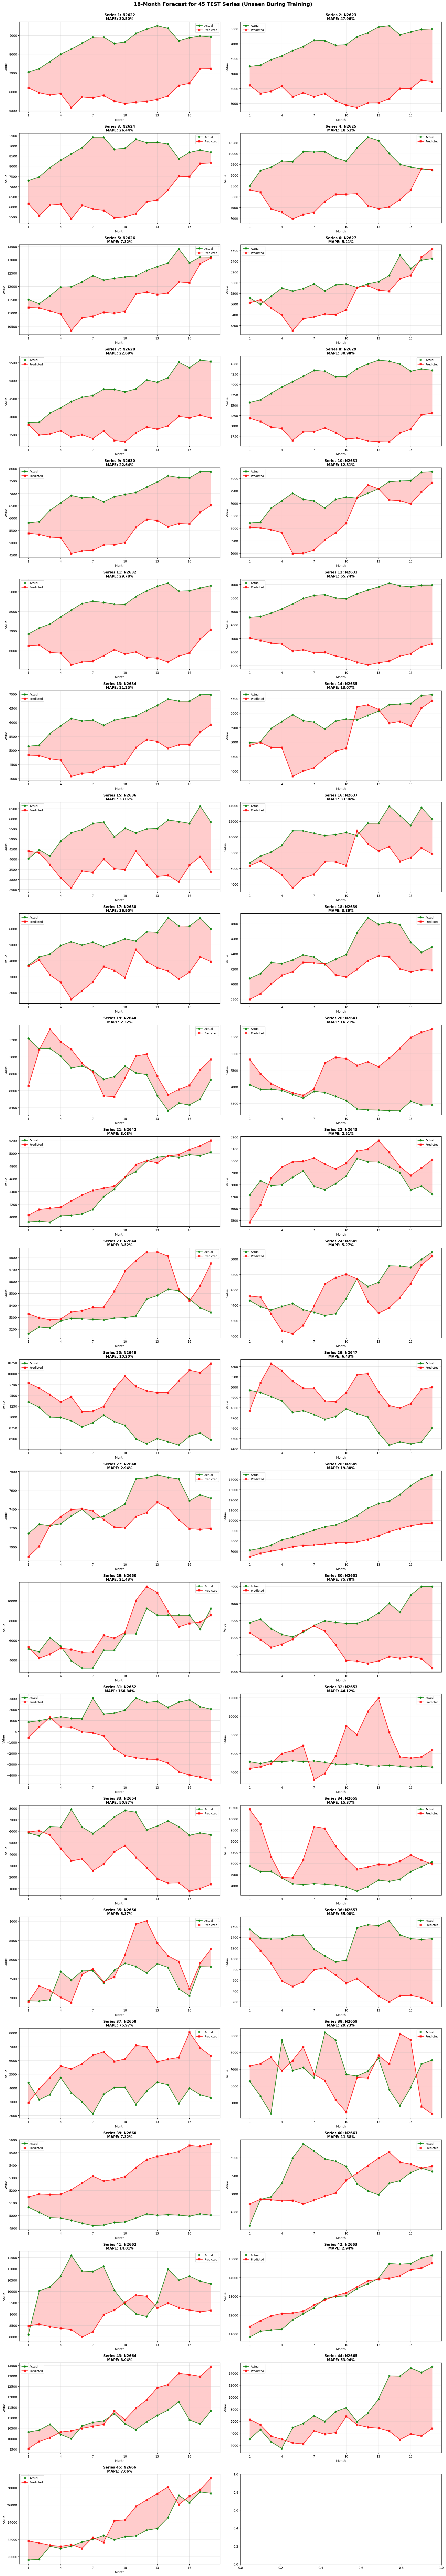

In [ ]:
# Plot all test series 
rows = (N_test + 1) // 2  
fig, axes = plt.subplots(rows, 2, figsize=(20, 5 * rows))
axes = axes.flatten()

for idx, result in enumerate(results):
    ax = axes[idx]
    
    actuals = result['actuals']
    predictions = result['predictions']
    
    months = np.arange(1, 19)
    ax.plot(months, actuals, 'go-', linewidth=2, markersize=6, 
            label='Actual', alpha=0.8)
    ax.plot(months, predictions, 'rs-', linewidth=2, markersize=6, 
            label='Predicted', alpha=0.8)
    ax.fill_between(months, actuals, predictions, 
                     alpha=0.2, color='red')
    
    ax.set_title(f"Series {idx+1}: {result['series_id']}\nMAPE: {result['mape']:.2f}%", 
                 fontsize=11, fontweight='bold')
    ax.set_xlabel('Month', fontsize=10)
    ax.set_ylabel('Value', fontsize=10)
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_xticks(months[::3])



plt.suptitle(f'18-Month Forecast for {N_test} TEST Series (Unseen During Training)', 
             fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()
plt.show()

7. Distributions and metrics 

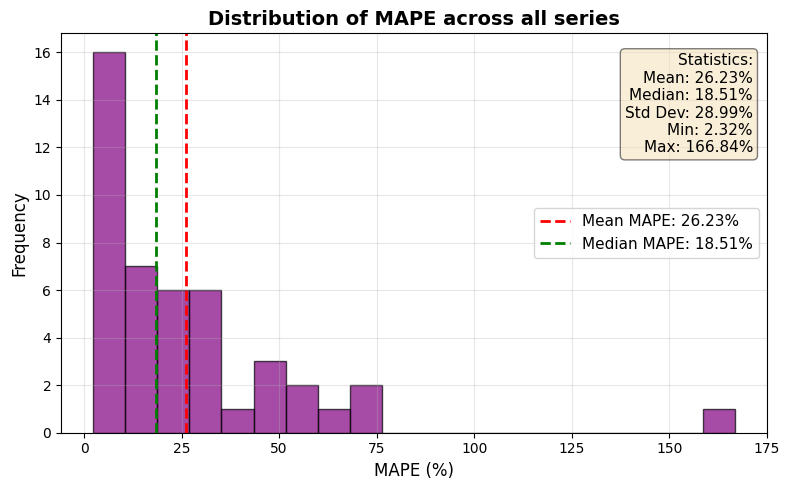


MAPE Error Distribution Analysis:
Mean MAPE:        26.23%
Median MAPE:      18.51%
Std Deviation:    28.99%
Min MAPE:         2.32%
Max MAPE:         166.84%
25th Percentile:  7.06%
75th Percentile:  33.07%

Top 5 Best Performing Series:
1. N2640: MAPE = 2.32%
2. N2643: MAPE = 2.51%
3. N2663: MAPE = 2.94%
4. N2648: MAPE = 2.94%
5. N2642: MAPE = 3.03%

Top 5 Worst Performing Series:
1. N2657: MAPE = 55.08%
2. N2633: MAPE = 65.74%
3. N2651: MAPE = 75.78%
4. N2658: MAPE = 75.97%
5. N2652: MAPE = 166.84%


In [66]:
# Plot MAPE distribution (no box plots)
fig, ax = plt.subplots(figsize=(8, 5))

# Histogram
mape_values = [r['mape'] for r in results]
ax.hist(mape_values, bins=20, alpha=0.7, color='purple', edgecolor='black')
ax.axvline(avg_mape, color='red', linestyle='--', linewidth=2, 
           label=f'Mean MAPE: {avg_mape:.2f}%')
ax.axvline(np.median(mape_values), color='green', linestyle='--', linewidth=2,
           label=f'Median MAPE: {np.median(mape_values):.2f}%')
ax.set_title('Distribution of MAPE across all series', fontsize=14, fontweight='bold')
ax.set_xlabel('MAPE (%)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Add statistics text
stats_text = f"""Statistics:
Mean: {avg_mape:.2f}%
Median: {np.median(mape_values):.2f}%
Std Dev: {np.std(mape_values):.2f}%
Min: {np.min(mape_values):.2f}%
Max: {np.max(mape_values):.2f}%"""

ax.text(0.98, 0.95, stats_text, transform=ax.transAxes,
        fontsize=11, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Print detailed statistics
print(f"\n{'='*60}")
print("MAPE Error Distribution Analysis:")
print(f"{'='*60}")
print(f"Mean MAPE:        {avg_mape:.2f}%")
print(f"Median MAPE:      {np.median(mape_values):.2f}%")
print(f"Std Deviation:    {np.std(mape_values):.2f}%")
print(f"Min MAPE:         {np.min(mape_values):.2f}%")
print(f"Max MAPE:         {np.max(mape_values):.2f}%")
print(f"25th Percentile:  {np.percentile(mape_values, 25):.2f}%")
print(f"75th Percentile:  {np.percentile(mape_values, 75):.2f}%")
print(f"{'='*60}")

# Show best and worst performing series
sorted_results = sorted(results, key=lambda x: x['mape'])
print("\nTop 5 Best Performing Series:")
for i, r in enumerate(sorted_results[:5], 1):
    print(f"{i}. {r['series_id']}: MAPE = {r['mape']:.2f}%")

print("\nTop 5 Worst Performing Series:")
for i, r in enumerate(sorted_results[-5:], 1):
    print(f"{i}. {r['series_id']}: MAPE = {r['mape']:.2f}%")
